<a href="https://colab.research.google.com/github/GubioGL/Optics/blob/main/Mult_Modos_w_and_r_diferente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade LightPipes
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
import PIL
from PIL import Image

In [ ]:
#Pedidno permissão para ter acesso ao drive
from google.colab import drive
drive.mount('/content/drive', True)
# Aqui estou chamando o arquivo(Que está no drive) com o pacote PIL e salvando como SLM, 
import PIL
from PIL import Image
# note que ainda é uma imagem, para convertem em dados temos que fazer os passo seguintes 
SLM  = Image.open('/content/drive/MyDrive/Colab Notebooks/Gubio/DD.png')

imgGray = SLM.convert('L')
imgGray.save('imgGray2.jpg')
imgGra  = plt.imread('imgGray2.jpg')
ri = imgGra/imgGra.max()

Mounted at /content/drive


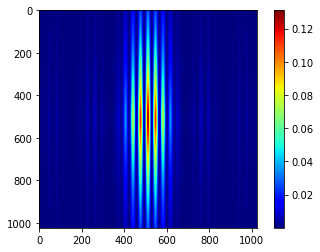

In [ ]:
########################################################################
n = 2**10 + 1
lamb = 512*nm        
k = 2*np.pi/lamb        
########################################################################
dx = 17*um  
x = np.arange(-n/2+1, n/2,1)*dx
y = np.arange(-n/2+1, n/2,1)*dx
xx,yy = np.meshgrid(x,y)
########################################################################
dzPar = np.arange(1e-20,100,1)*cm  
z = dzPar[0]       
###############################################################################
N_inc = 100
i=0
SI = [0]
while (i<N_inc):
  i+=1
  wfm = np.arange(1,N_inc+1,0.1)
  w_0 = wfm[i-1]*1.6*mm         
  r    = np.sqrt(xx**2+yy**2) 
  z_R = np.pi*w_0**2/lamb                                                 
  w    = w_0*np.sqrt(1+(z/z_R)**2)
  GAUSSIAN   = np.exp( -r**2/w**2 )*np.exp(-1j*k*z)  # Campos Gaussianos

  F = Begin(2*abs(x[1]),lamb,n);    # Criando o Campo no Lpipe
  Ffase = F.copy(F)
  Ffase.field = GAUSSIAN            # Modulando a Campo criado
  
  f00     = random.random()*2*np.pi # Gerando numeros aleatório 
  fx      = np.ones(n-1)            # Vetor com números 1
  fxx,fyy = np.meshgrid(fx,fx)      # Grades com números 1
  novafase=  np.sqrt(( fxx**2 + fyy**2)/2)*f00 
  
  ##### Aterando a antiga fase  ############  
  EE = SubPhase(novafase,Ffase) 
  # 1° ENTRADA COLCOAR A FASE NOVA, 2°Campo
  EEint = EE.field*ri

  Fint = F.copy(F)
  Fint.field = EEint

  propagação = Forvard(60*cm,Fint) 
  imagem = Intensity(0,propagação)
  
  #plt.imshow(imagem,cmap='jet')
  #plt.colorbar()
  #plt.show()

  #fase = Phase(EE)
  #plt.imshow(fase,cmap='jet')
  #plt.colorbar()
  #plt.show()
  
  SI = SI + imagem
##############################################################################

imagem = SI/N_inc
   
plt.imshow(imagem,cmap='jet')
plt.colorbar()
plt.show()


In [ ]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,1024,1):
    b = imagem[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:1024]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 

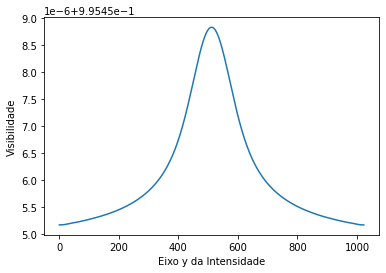

In [ ]:
# A VISIBILIDADE TODA
VisibilidadeN = []

for j in range(0,1024):
  V = ( MM(2,j)[0]  - MM(2,j)[2] )/( MM(2,j)[0]  + MM(2,j)[2])
  VisibilidadeN.append(V) 
  
plt.plot(VisibilidadeN) 
plt.xlabel('Eixo y da Intensidade')
plt.ylabel("Visibilidade")
plt.show()


(0.11335936766193674, 511, 0.0001093752696513995, 531)


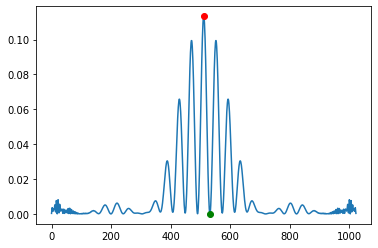

Visibilidade = 0.9954588365186711


In [ ]:
qe =1
qw = 512
print(MM(qe,qw))

# DISTRIBUIÇÃO DE INTENSIDADE

plt.plot(imagem[qw])
plt.plot(MM(qe,qw)[1] , MM(qe,qw)[0] , 'o', color ='red'  )
plt.plot(MM(qe,qw)[3] , MM(qe,qw)[2] , 'o', color ='green'  )
plt.show()

# VISIBILIDADE

V = ( MM(2,qw)[0]  - MM(2,qw)[2] )/( MM(2,qw)[0]  + MM(2,qw)[2])
print("Visibilidade =",V)